# Loading the data

**Made by: Christian Lindholm, Mads Harby, Rasmus Thyregod**

About the Dataset

* Age: Describes the age of individuals. Continuous.
* Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: Continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: Number of years spent in education. Continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Continuous.
* capital-loss: Continuous.
* hours-per-week: Continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K,<=50K

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')

In [ ]:
# Source: http://archive.ics.uci.edu/dataset/2/adult

features = ["Age","Workclass","Fnlwgt","Education","Education-num","Marital-status","Occupation","Relationship","Race","Sex","Capital-gain","Capital-loss","Hours-per-week","Country","Income"]

# Data Set Link
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=features, sep=r'\s*,\s*', engine='python', na_values="?")

In [ ]:
dataset.head(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Data Analysis

In [ ]:
# Observations from running dataset.info:

# Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
# There are no Float Datatypes in the dataset.
# Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
# There are no null values in the set, however, a closer look tells us that there are a lot of '?' values in our dataset. We will have to replace those values!

# This line of code replaces any occurrences of the string '?' in the DataFrame with NaN values, effectively marking those values as missing data.
dataset[dataset == '?'] = np.nan

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Observations from running dataset.describe().T:

# The minimum age in the dataset is 17, with the maximum being 90.
# The average age in the dataset is 37.
# The minimum years spent on education is 1, with the maximum being 16.
# The average years spent on education is 10.
# The capital gain maximum number is 99999, which is a weird number and might be an error in the dataset.

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
# This line of code replaces missing values in the specified columns ('Workclass', 'Occupation', and 'Country') with the most common value found in each respective column (mode).
# This helps in filling in missing data with reasonable estimates based on the most frequent values in each column.
for col in ['Workclass', 'Occupation', 'Country']:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

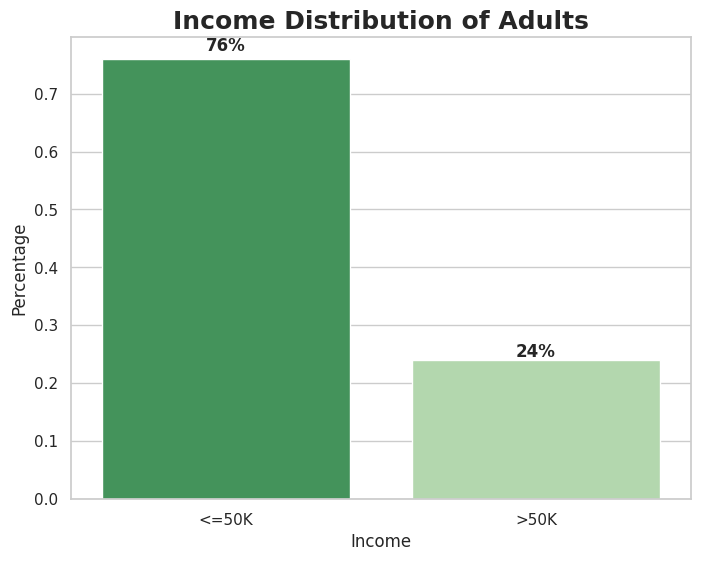

In [ ]:
# Observations from diagram:
# The number of people earning more than 50K a year is one 24%, which is almost 1/4 of the entire dataset.

sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = dataset['Income'].value_counts(normalize = True).rename_axis('Income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [ ]:
# By separating the dataset into age groups we might be able to get see income patterns.

def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

dataset['age_group'] = dataset['Age'].apply(age_group)

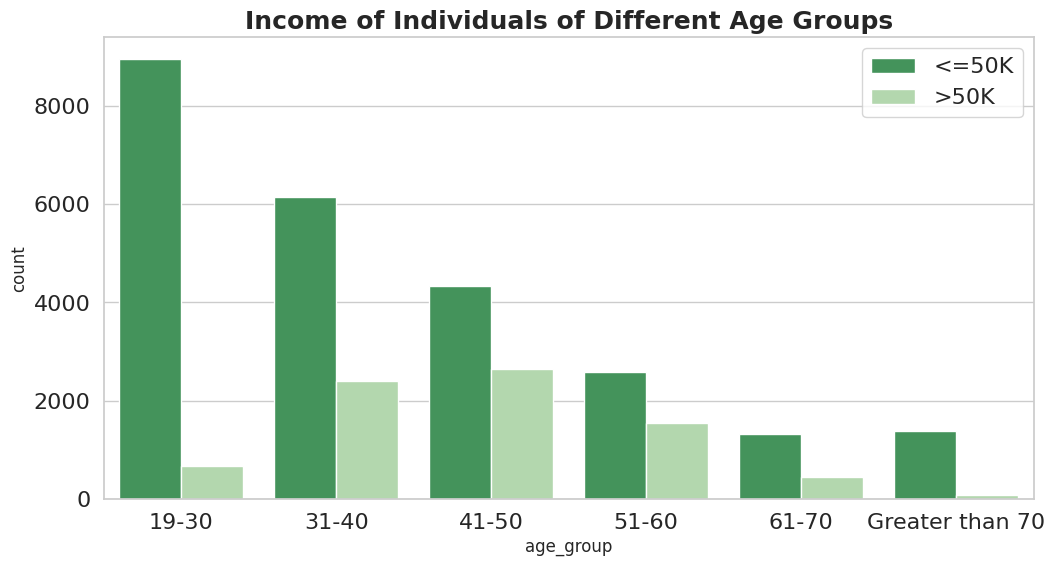

In [ ]:
# The number of people earning more than 50K is quite small amongst people of age group 19-30.
# For the people of age group 41-50 and 51-60, the number of people earning more than 50K is comparable to those earning less than it.

plt.figure(figsize=(12, 6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

sns.countplot(x='age_group', hue='Income', data=dataset, palette='Greens_r', order=order_list)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

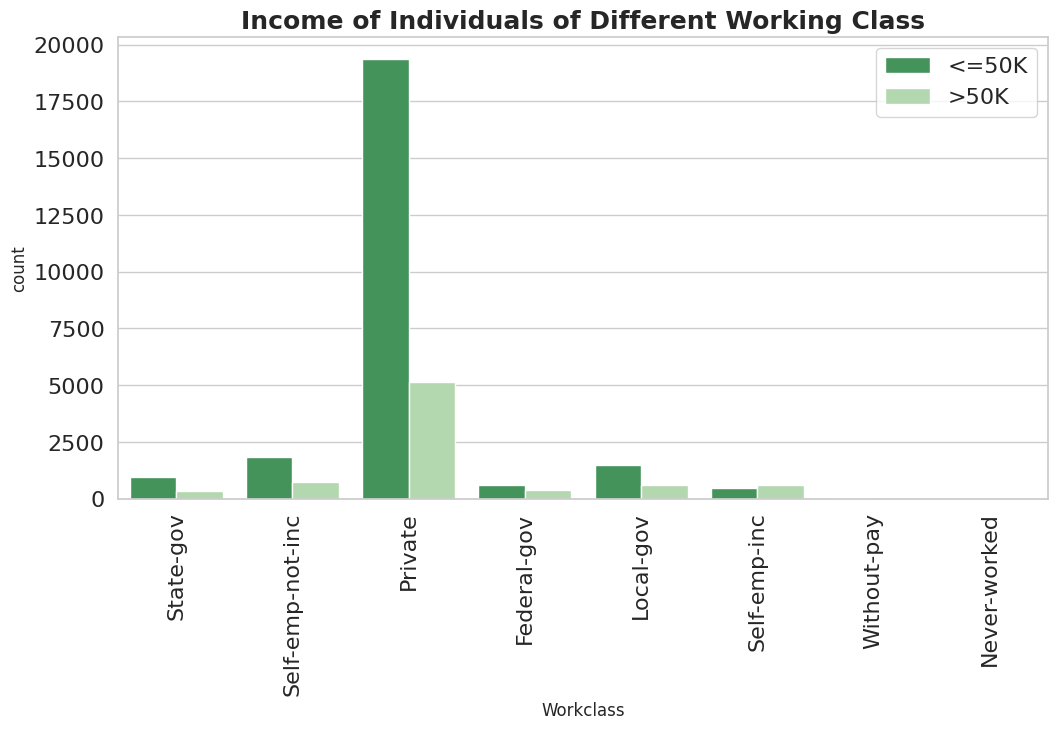

In [ ]:
# In the graph below, we have segregated the incomes of adults on the basis of their different working classes.
# Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it

plt.figure(figsize=(12, 6))
sns.countplot(x='Workclass', hue='Income', data=dataset, palette='Greens_r')

plt.title('Income of Individuals of Different Working Class', fontsize=18, fontweight='bold')

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

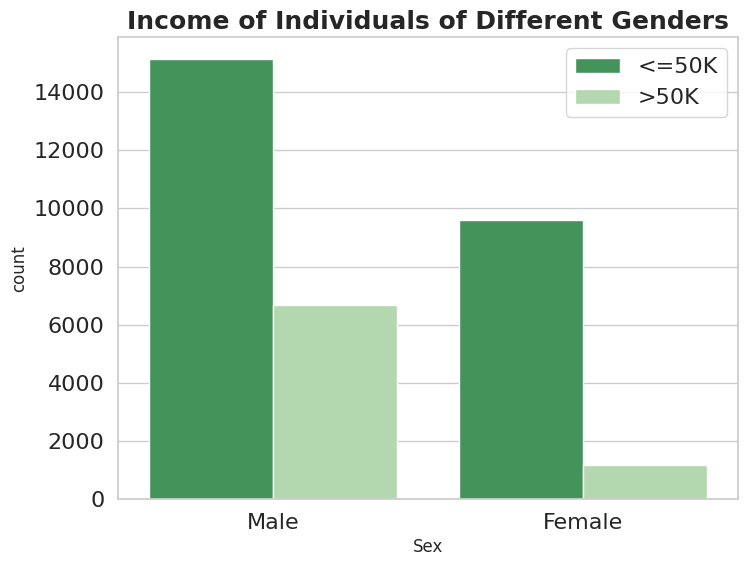

In [ ]:
# In this graph we can see a significant gap in the earnings between males and females.
# For Females, there are less than 10% of the entries earning more than 50K dollars a year.
# In case of Males there are close to 33% of them earning more than 50K dollars a year.

plt.figure(figsize=(8, 6))

# Create a countplot of income distribution with respect to gender
sns.countplot(x=dataset['Sex'], hue=dataset['Income'], palette='Greens_r')

plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

# Data preprocessing

In [ ]:
# The object columns in the dataset need to be encoded so that they can be further used.
# This is done by using Label Encoder in the sklearn’s preprocessing library.

from sklearn.preprocessing import LabelEncoder
for col in dataset.columns:
  if dataset[col].dtypes == 'object':
    encoder = LabelEncoder()
    dataset[col] = encoder.fit_transform(dataset[col])

In [ ]:
# The dataset is then split into X which contains all the independent features and Y which contains the dependent feature ‘Income’.

X = dataset.drop('Income', axis = 1)
Y = dataset['Income']

In [ ]:
# To deal with multicollinearity and overfitting, we can use Feature Selection.
# Feature selection is the process of choosing the most relevant and informative features from our dataset while discarding or ignoring less important or redundant ones.
# We'll find feature importances using the ExtraTreesClassifier.

# Import the necessary library
from sklearn.ensemble import ExtraTreesClassifier

# Create a selector object
selector = ExtraTreesClassifier(random_state=42)

# Fit the selector to your data (X and Y are your dataset and target)
selector.fit(X, Y)

# Get the feature importances
feature_importances = selector.feature_importances_

# Print the feature importances as percentages
for index, importance in enumerate(feature_importances):
    print(f"Feature {index}: {round(importance * 100, 2)}%")

Feature 0: 11.88%
Feature 1: 4.45%
Feature 2: 15.97%
Feature 3: 3.82%
Feature 4: 8.9%
Feature 5: 6.52%
Feature 6: 7.74%
Feature 7: 8.77%
Feature 8: 1.56%
Feature 9: 3.1%
Feature 10: 8.85%
Feature 11: 2.78%
Feature 12: 9.43%
Feature 13: 1.57%
Feature 14: 4.67%


In [ ]:
# After running this code, X will no longer contain these columns, and it will only include the remaining columns.
# This can be useful for feature selection or data preprocessing when you want to exclude certain features from your analysis or modeling.

X = X.drop(['Workclass', 'Education', 'Race', 'Sex', 'Capital-loss', 'Country'], axis = 1)

In [ ]:
# Using Feature Scaling we can standardize the dataset to help the model learn the patterns.
# This can be done with StandardScaler() from sklearn’s preprocessing library.

from sklearn.preprocessing import StandardScaler
for col in X.columns:
  scaler = StandardScaler()
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [ ]:
# The dependent feature ‘Income’ is highly imbalanced as 75.92% values have income less than 50k and 24.08% values have income more than 50k.

round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: Income, dtype: object

In [ ]:
# The F1 score is a simple and commonly used metric in machine learning and statistics that combines two important aspects of a classification model's performance: precision and recall.
# It's a single number that summarizes how well a model can correctly classify instances in a binary classification problem.

# Precision measures the accuracy of positive predictions. It answers the question: "Of all the instances the model predicted as positive, how many were actually positive?"
# Recall (also known as sensitivity or true positive rate) measures the model's ability to identify all relevant instances. It answers the question: "Of all the actual positive instances, how many did the model correctly identify?"

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
ros.fit(X, Y)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Income, dtype: object

In [ ]:
# The dataset is split into training data and testing data in the ratio 80:20 using the train_test_split() command.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 9)
X_test shape: (9888, 9)
Y_train shape: (39552,)
Y_test shape: (9888,)


# Data Modelling - Random Forest

In [ ]:
# Import the RandomForestClassifier from the scikit-learn library
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance with a fixed random state for reproducibility
ran_for = RandomForestClassifier(random_state=42)

# Train (fit) the RandomForestClassifier on your training data
# X_train should contain your training features, and Y_train should contain your training labels
ran_for.fit(X_train, Y_train)

# Use the trained model to make predictions on your test data (X_test)
Y_pred_ran_for = ran_for.predict(X_test)

# Model Evaluation

In [ ]:
# Here we use the accuracy score with f1 score as we have an imbalanced dataset.

# Accuracy is the ratio of correct predicted values over the total predicted values. It tells us how accurate our prediction is.
# F1 score is the weighted average of precision and recall and higher its value better the model.

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Random Forest Classifier:')
print('Accuracy score:',round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:',round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.36
F1 score: 92.75


# Hyperparameter Tuning

In [ ]:
# Here we tune the hyperparameters of our random forest classifier using RandomizedSearchCV, which finds the best hyperparameters by searching randomly avoiding unnecessary computation.

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 15)]
max_depth = [int(x) for x in np.linspace(40, 150, num = 15)]
param_dist = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
}
rf_tuned = RandomForestClassifier(random_state = 42)
rf_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = param_dist, cv = 5, random_state = 42)
rf_cv.fit(X_train, Y_train)
rf_cv.best_score_

0.9106238221324754

In [ ]:
# The model gives us the best values for an accuracy score of 92.43 and f1 score of 92.79 after tuning its hyperparameters.

rf_best = RandomForestClassifier(max_depth = 102, n_estimators = 40, random_state = 42)
rf_best.fit(X_train, Y_train)
Y_pred_rf_best = rf_best.predict(X_test)
print('Random Forest Classifier:')
print('Accuracy score:',round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:',round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.43
F1 score: 92.79


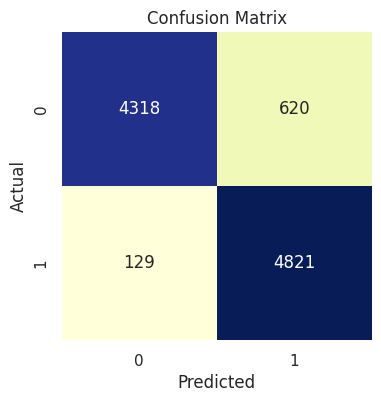

In [ ]:
# Here we make a confusion matrix, which tells us how many predictions our model got right and how many it got wrong for each class, helping us see where its making mistakes.

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4938
           1       0.89      0.97      0.93      4950

    accuracy                           0.92      9888
   macro avg       0.93      0.92      0.92      9888
weighted avg       0.93      0.92      0.92      9888



**Precision:**

Precision measures the accuracy of positive predictions.

For the "<= 50K" (0) class, the precision is 0.97, indicating that 97% of individuals predicted as having income  "<= 50K" actually belong to this group.

For the ">50K" (1) class, the precision is 0.89, meaning that 89% of individuals predicted as having income > $50K are correctly classified.

-------------------------------------------
**Recall:**

Recall measures the model's ability to identify all relevant instances.

For the "<=50K" (0) class, the recall is 0.87, indicating that 87% of individuals with income <= 50K are correctly identified by the model.

For the ">50K" (1) class, the recall is 0.97, indicating that 97% of individuals with income > $50K are correctly identified.

-------------------------------------------
**F1-Score:**

The F1-score is the harmonic average of precision and recall.

For the "<=50K" (0) class, the F1-score is 0.92.

For the ">50K" (1) class, it is 0.93.

These scores reflect a good balance between precision and recall for both classes.

-------------------------------------------
**Accuracy:**

The overall accuracy of the model is 0.92, indicating that it correctly predicts the income level for approximately 92% of the individuals in the test dataset.

-------------------------------------------
**Macro Average:**

The macro average for precision, recall, and F1-score is 0.92-0.93, demonstrating strong performance across both income classes.

-------------------------------------------
**Weighted Average:**

The weighted average for precision, recall, and F1-score is also 0.92-0.93, which accounts for class imbalances and provides a comprehensive evaluation of the model's performance.

-------------------------------------------

Overall, the RandomForest model exhibits strong predictive capabilities, achieving high precision, recall, and F1-scores for both income classes. Its accuracy of 92% suggests that it is effective at distinguishing between individuals with different income levels.
